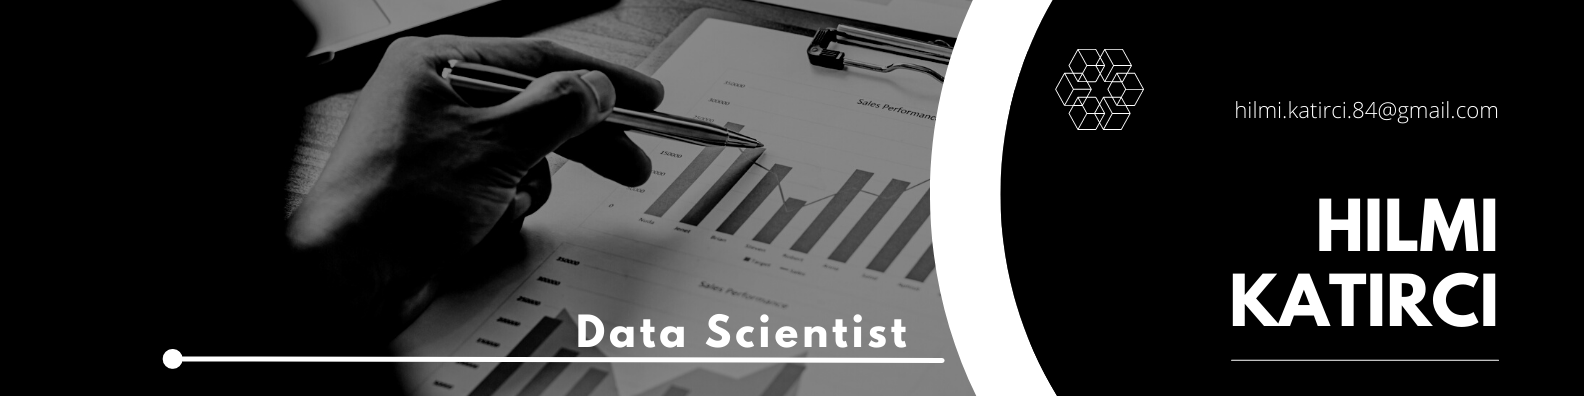



# Transformers, what can they do? --Huggingface

Install the Transformers and Datasets libraries to run this notebook.

In [1]:
!pip install datasets transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Sentiment_Analysis

In [2]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
%%time
classifier("I've been waiting for a HuggingFace course my whole life.")

CPU times: user 71.3 ms, sys: 4.99 ms, total: 76.3 ms
Wall time: 172 ms


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [4]:
classifier = pipeline("sentiment-analysis", device="cuda:0")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
%%time
classifier("I've been waiting for a HuggingFace course my whole life.")

CPU times: user 482 ms, sys: 120 ms, total: 602 ms
Wall time: 2.46 s


[{'label': 'POSITIVE', 'score': 0.9598046541213989}]

In [6]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598046541213989},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## How can we use this model in our own data?

In [7]:
classifier("I've been waiting for a HuggingFace course my whole life.")[0]

{'label': 'POSITIVE', 'score': 0.9598046541213989}

In [11]:
classifier("I've been waiting for a HuggingFace course my whole life.")[0]["label"]

'POSITIVE'

In [12]:
y_pred = []
for i in ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]:
  if classifier(i)[0]['label']=="POSITIVE":
    y_pred.append(0)
  else:
    y_pred.append(1)
y_pred

[0, 1]

## Zero_Shot Classification

In [13]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", device="cuda:0")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [25]:
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/base.py:1045: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445962071418762, 0.11197629570960999, 0.04342754930257797]}

In [18]:
classifier(
    ["world cup will be held in qatar this year", "ballet and theater are indispensable for me.", "This year, a new law on animal rights was enacted."],
    candidate_labels=["education", "politics", "business", "art", "sport", "justice", "music", "space"],
)

[{'sequence': 'world cup will be held in qatar this year',
  'labels': ['sport',
   'politics',
   'space',
   'business',
   'music',
   'justice',
   'art',
   'education'],
  'scores': [0.8292061686515808,
   0.038249898701906204,
   0.03533438965678215,
   0.032762233167886734,
   0.020598281174898148,
   0.018067630007863045,
   0.016721751540899277,
   0.009059661068022251]},
 {'sequence': 'ballet and theater are indispensable for me.',
  'labels': ['art',
   'music',
   'justice',
   'sport',
   'space',
   'business',
   'education',
   'politics'],
  'scores': [0.7915460467338562,
   0.12224036455154419,
   0.028442729264497757,
   0.019930677488446236,
   0.01881854236125946,
   0.008161953650414944,
   0.008062859065830708,
   0.0027968513313680887]},
 {'sequence': 'This year, a new law on animal rights was enacted.',
  'labels': ['justice',
   'sport',
   'space',
   'business',
   'politics',
   'art',
   'music',
   'education'],
  'scores': [0.49627479910850525,
   0.123

## Text Generation (Completing the entered sentence in accordance with the context)

In [26]:
from transformers import pipeline

generator = pipeline("text-generation", device="cuda:0")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/124 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [27]:
generator("In this course, we will teach you how to")

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'In this course, we will teach you how to create and configure a real-time smart contract to ensure that users in your country do not receive spam via bots and malicious tools in their local currency.\n\nThe purpose of the test will be to'}]

In [28]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2", device="cuda:0")

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/353M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/124 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [29]:
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to implement and execute the Java VM\u200f. In order to understand everything it takes and develop Java,'},
 {'generated_text': 'In this course, we will teach you how to handle the "Migration and Resettlement Programs."\n\n\n\nFor more information, click here'}]

## Predict the next token

In [30]:
from transformers import pipeline

unmasker = pipeline("fill-mask", device="cuda:0")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [31]:
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'score': 0.19619779288768768,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.040527261793613434,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

## Named Entity Recognition (Token Classification)

In [32]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True, device="cuda:0")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/token_classification.py:159: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [33]:
ner("My name is Sylvain and I work at Hugging Face in Brooklyn. my phone is 535 555 55 55")

[{'entity_group': 'PER',
  'score': 0.99789876,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9891248,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.993338,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

## Question Answering

In [34]:
from transformers import pipeline

question_answerer = pipeline("question-answering", device="cuda:0")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [35]:
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.6949766278266907, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [36]:
question_answerer(
    question=["Where do you work?", "In which city do you work?", "what is your name"],
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

[{'score': 0.714407742023468,
  'start': 33,
  'end': 45,
  'answer': 'Hugging Face'},
 {'score': 0.8743696212768555, 'start': 49, 'end': 57, 'answer': 'Brooklyn'},
 {'score': 0.990521252155304, 'start': 11, 'end': 18, 'answer': 'Sylvain'}]

## Summarization

In [37]:
from transformers import pipeline

summarizer = pipeline("summarization", device="cuda:0")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [38]:
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

## Translation

In [39]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en", device="cuda:0")

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/293 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/802k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [40]:
translator("Ce cours est produit par Hugging Face.")

[{'translation_text': 'This course is produced by Hugging Face.'}]

## How to use a pre-trained model in Hugginface

### Question Answering

In [41]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model="deepset/roberta-base-squad2", device="cuda:0")

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/496M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [42]:
question_answerer(
    question="Which team beat real madrid?",
    context="Barcelona became champion of Spain after beating Real Madrid",
)

{'score': 0.9333109259605408, 'start': 0, 'end': 9, 'answer': 'Barcelona'}

### Translation

In [44]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-tr-en", device="cuda:0")

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/293 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/840k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/797k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

In [45]:
translator("Bugün çok mutluyum.")

[{'translation_text': "I'm very happy today."}]

### Zero Shot Classification

In [46]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli", device="cuda:0")

Downloading:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/558M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/463 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [47]:
classifier(
    ["Galatasaray bu sene şampiyonlar ligine katılacak", "Savaş sonrası enflasyon arttı"],
    candidate_labels=["spor", "siyaset", "ekonomi", "sanat"],
)

[{'sequence': 'Galatasaray bu sene şampiyonlar ligine katılacak',
  'labels': ['spor', 'siyaset', 'sanat', 'ekonomi'],
  'scores': [0.719340443611145,
   0.14446665346622467,
   0.06898362189531326,
   0.06720928102731705]},
 {'sequence': 'Savaş sonrası enflasyon arttı',
  'labels': ['ekonomi', 'siyaset', 'sanat', 'spor'],
  'scores': [0.8702479600906372,
   0.1067885234951973,
   0.012205558829009533,
   0.010757854208350182]}]

### Fill Mask

In [48]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased", device="cuda:0")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [49]:
unmasker("Galatasaray [MASK] Fenerbahce 5-0.", top_k=2)

[{'score': 0.47965753078460693,
  'token': 3249,
  'token_str': 'defeated',
  'sequence': 'galatasaray defeated fenerbahce 5 - 0.'},
 {'score': 0.44297826290130615,
  'token': 3786,
  'token_str': 'beat',
  'sequence': 'galatasaray beat fenerbahce 5 - 0.'}]

In [50]:
unmasker("Fenerbahce [MASK] 5-0 to Galatasaray", top_k=2)

[{'score': 0.890109658241272,
  'token': 2439,
  'token_str': 'lost',
  'sequence': 'fenerbahce lost 5 - 0 to galatasaray'},
 {'score': 0.04882636293768883,
  'token': 4558,
  'token_str': 'lose',
  'sequence': 'fenerbahce lose 5 - 0 to galatasaray'}]

## Sentence Similarity

In [51]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ed9a021a8b65fc160a9d9d61494eb959b9d5bb7db967417024f5f24f92a16b61
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [52]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens', device="cuda:0")

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [53]:
sentences = ["This is an example sentence", "Each sentence is converted", "Let me give you an example from the sentence"]
sentence_embeddings = model.encode(sentences)
sentence_embeddings

array([[-0.3930998 ,  0.03886286,  1.9874249 , ..., -0.6093679 ,
        -1.0946212 ,  0.32649025],
       [ 0.0615339 ,  0.32736185,  1.8332324 , ..., -0.12985356,
         0.46089375,  0.24035455],
       [ 0.03920062, -0.0895465 ,  2.0578134 , ..., -0.11227336,
        -0.97448117,  0.11509874]], dtype=float32)

In [54]:
sentence_embeddings[0]

array([-3.93099815e-01,  3.88628617e-02,  1.98742485e+00, -1.36893213e-01,
        1.93090126e-01,  3.74967426e-01,  1.15454681e-01,  3.02820891e-01,
        2.32356176e-01, -1.23268947e-01, -2.69239724e-01,  4.10017550e-01,
       -2.14587763e-01,  1.45402923e-01,  4.17345494e-01, -2.67233074e-01,
       -2.92259634e-01, -1.81809634e-01,  9.90739405e-01, -7.87549675e-01,
       -7.95891434e-02,  7.74834752e-01, -3.67453426e-01, -1.04439950e+00,
        3.26536953e-01, -8.63254845e-01,  3.20690632e-01, -1.12830257e+00,
       -4.59387690e-01, -4.49140891e-02,  6.30562827e-02, -6.13953888e-01,
        3.75282109e-01, -1.02702342e-01,  8.16333294e-02,  2.59928316e-01,
        4.26196724e-01, -1.09221265e-02,  1.49220571e-01,  2.61052787e-01,
        8.91624272e-01, -5.76651096e-01,  9.52781260e-01,  1.79337993e-01,
       -9.76019561e-01, -6.75556600e-01, -7.54612982e-01,  3.20075363e-01,
       -3.51041555e-01, -7.56071031e-01, -1.71005094e+00,  3.14682692e-01,
        3.91977727e-01,  

In [55]:
len(sentence_embeddings[0])

768

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
for i in range(1, len(sentence_embeddings)):

   print(cosine_similarity(sentence_embeddings[[0]], sentence_embeddings[[i]]))

[[0.5783694]]
[[0.8971246]]


In [58]:
sentences = ["How old are you?", "What is your age?", "How old do I show?"]
embeddings = model.encode(sentences)
for i in range(1, len(embeddings)):

   print(cosine_similarity(embeddings[[0]], embeddings[[i]]))

[[0.8182197]]
[[0.940009]]


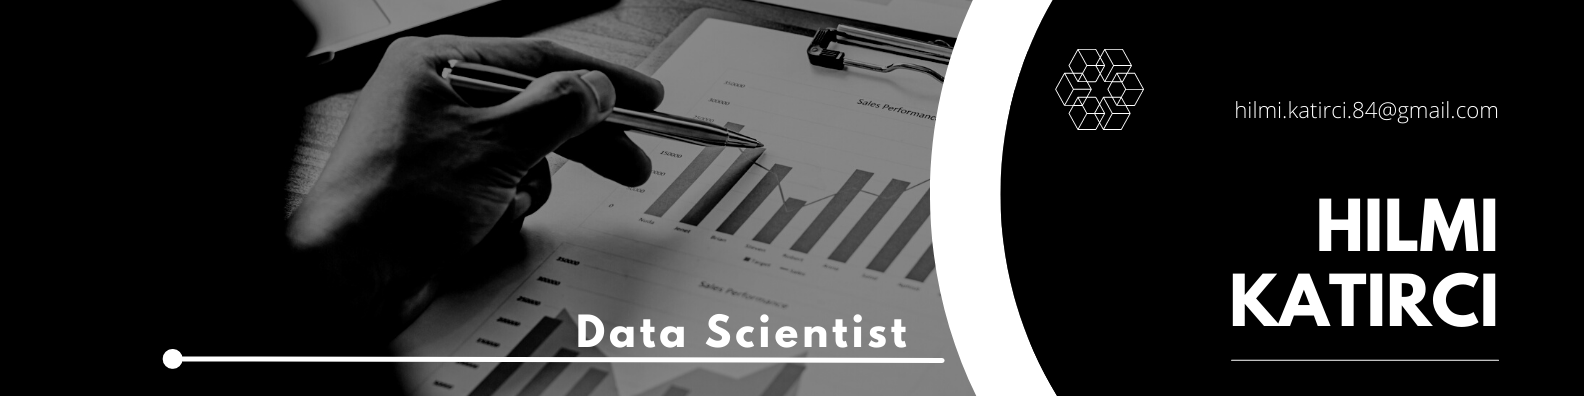